In [1]:
#Imports
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.core.frame import DataFrame
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as web
from pandas_datareader import data, wb
import scipy.optimize as sco
from scipy import stats
#from pandas.util.testing import assert_frame_equal
import math
import seaborn as sns
import datetime as dt
from datetime import datetime
# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import seaborn as sns
from pylab import rcParams
%config InlineBackend.figure_format='retina'
#sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
#sns.set_palette(sns.coloB_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 2 # I'm seeding with 2, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)
import pandas as pd
from yahoofinancials import YahooFinancials
import yfinance as yf

![alt text](AstraAllocation.png "Astra Allocation")

In [ ]:
Tickers = ['CSPX.L','EDMU.DE','IJS','IMEU.AS','IJPN.AS','EIMU.L','DFND','BLKC.AS','IDTL.L','ITPS.MI','LQDE.MI','SHYU.L','AGGG.L','IWDP.L','ICOM.L','INFR.AS','^GSPC']

date_start = "2025-01-01"
date_end = "2025-10-01"

dataset = pd.DataFrame()

for ticker in Tickers:
    yf_ticker = yf.download(ticker, start=date_start, end=date_end)
    ticker_data = yf_ticker
    dataset[ticker] = ticker_data['Close']

dataset.head()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%*******

,CSPX.L,EDMU.DE,IJS,IMEU.AS,IJPN.AS,EIMU.L,DFND,BLKC.AS,IDTL.L,ITPS.MI,LQDE.MI,SHYU.L,AGGG.L,IWDP.L,ICOM.L,INFR.AS,^GSPC
Date,,,,,,,,,,,,,,,,,
2025-01-02,625.799988,10.482,106.779289,30.994896,16.528252,4.614377,40.000263,12.4851,3.160671,232.789993,94.303566,73.295769,4.127860,1848.555176,6.96750,31.102018,5868.549805
2025-01-03,628.549988,10.470,107.667969,30.824030,16.403809,4.635421,41.995323,13.2612,3.152838,232.020004,93.744705,73.145569,4.126890,1845.056030,6.89000,31.067644,5942.470215
2025-01-06,638.250000,10.522,107.559349,31.151115,16.409689,4.673592,39.653721,13.9585,3.138150,229.369995,92.540253,72.670715,4.122043,1836.558105,6.95875,30.635536,5975.379883
2025-01-07,630.349976,10.430,106.887901,31.204813,16.405771,4.645942,40.426006,13.4562,3.098985,229.380005,92.039200,72.651337,4.108469,1817.062866,6.94750,30.620802,5909.029785
2025-01-08,626.619995,10.438,106.601555,31.195051,16.364616,4.598228,41.173534,12.6912,3.098495,231.240005,92.983490,73.382980,4.102167,1823.811157,6.96000,30.640448,5918.250000


In [32]:
date_start = "2024-12-31"
date_end = "2025-10-01"

# === Equity (60%) ===
CSPX = yf.download("CSPX.L", start=date_start, end=date_end, group_by="ticker")  # US Core LC
EDMU = yf.download("EDMU.DE", start=date_start, end=date_end, group_by="ticker")  # US Mid-cap
ISP6 = yf.download("IJS", start=date_start, end=date_end, group_by="ticker")  # US Small-cap
IMEU = yf.download("IMEU.AS", start=date_start, end=date_end, group_by="ticker")  # Europe
IJPN = yf.download("IJPN.AS", start=date_start, end=date_end, group_by="ticker")  # Japan
EIMU = yf.download("EIMU.L", start=date_start, end=date_end, group_by="ticker")  # Emerging Markets
DFND = yf.download("DFND", start=date_start, end=date_end, group_by="ticker")  # A&C Defence
BLKC = yf.download("BLKC.AS", start=date_start, end=date_end, group_by="ticker")  # Blockchain

# === Fixed Income (20%) ===
IDTL = yf.download("IDTL.L", start=date_start, end=date_end, group_by="ticker")  # US Govt LD
ITPS = yf.download("ITPS.MI", start=date_start, end=date_end, group_by="ticker")  # USG mid duration
LQDE = yf.download("LQDE.MI", start=date_start, end=date_end, group_by="ticker")  # US Corp IG
SHYU = yf.download("SHYU.L", start=date_start, end=date_end, group_by="ticker")  # US Corp HY
AGGG = yf.download("AGGG.L", start=date_start, end=date_end, group_by="ticker")  # Global

# === Real Assets (5%) ===
IWDP = yf.download("IWDP.L", start=date_start, end=date_end, group_by="ticker")  # Real Estate
ICOM = yf.download("ICOM.L", start=date_start, end=date_end, group_by="ticker")  # Commodities

# === Diversifying Strategies (5%) ===
INFR = yf.download("INFR.AS", start=date_start, end=date_end, group_by="ticker")  # Infrastructure

# === Benchmark ===
GSPC = yf.download("^GSPC", start=date_start, end=date_end, group_by="ticker")  # S&P 500

# === Vérification des dimensions ===
print(
    CSPX.shape, EDMU.shape, ISP6.shape, IMEU.shape, IJPN.shape, EIMU.shape,
    DFND.shape, BLKC.shape, IDTL.shape, ITPS.shape, LQDE.shape, SHYU.shape,
    AGGG.shape, IWDP.shape, ICOM.shape, INFR.shape, GSPC.shape
)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

(190, 5) (191, 5) (187, 5) (192, 5) (192, 5) (190, 5) (187, 5) (192, 5) (190, 5) (190, 5) (190, 5) (190, 5) (190, 5) (190, 5) (190, 5) (192, 5) (187, 5)


In [33]:
EDMU.head()

Ticker     EDMU.DE                                
Price         Open    High     Low   Close  Volume
Date                                              
2025-01-02  10.392  10.482  10.386  10.482  226458
2025-01-03  10.418  10.470  10.386  10.470  173596
2025-01-06  10.486  10.532  10.440  10.522  266431
2025-01-07  10.436  10.502  10.410  10.430  159895
2025-01-08  10.426  10.460  10.386  10.438  393754

In [ ]:
# Liste des tickers et leurs DataFrames
tickers_dict = {
    'CSPX.L': CSPX,
    'EDMU.DE': EDMU,
    'IJS': ISP6,
    'IMEU.AS': IMEU,
    'IJPN.AS': IJPN,
    'EIMU.L': EIMU,
    'DFND': DFND,
    'BLKC.AS': BLKC,
    'IDTL.L': IDTL,
    'ITPS.MI': ITPS,
    'LQDE.MI': LQDE,
    'SHYU.L': SHYU,
    'AGGG.L': AGGG,
    'IWDP.L': IWDP,
    'ICOM.L': ICOM,
    'INFR.AS': INFR,
    '^GSPC': GSPC
}

close_columns = []


for ticker, df in tickers_dict.items():
    # Extraire la colonne Close et renommer avec le ticker
    close_col = df[ticker].Close.rename(ticker)
    close_columns.append(close_col)

# Concaténer toutes les colonnes en un seul DataFrame
dataset = pd.concat(close_columns, axis=1)

for col in dataset.columns:
    dataset[f'B_{col}'] = dataset[col].pct_change(1)

In [38]:
# Calculate cumulative returns from a basis of 1 for each ticker, keeping R_ columns unchanged
for col in dataset.columns:
    if col.startswith('R_'):
        base_col = col.replace('R_', 'B_')
        returns = dataset[col].copy()
        returns.iloc[0] = 0  # Set first return to 0
        dataset[base_col] = (1 + returns.fillna(0)).cumprod()
        dataset.at[dataset.index[0], base_col] = 1  # Force first row to 1

# Display the first few rows of the new columns
basis_cols = [col for col in dataset.columns if col.startswith('B_')]
dataset[basis_cols].head()

,B_CSPX.L,B_EDMU.DE,B_IJS,B_IMEU.AS,B_IJPN.AS,B_EIMU.L,B_DFND,B_BLKC.AS,B_IDTL.L,B_ITPS.MI,B_LQDE.MI,B_SHYU.L,B_AGGG.L,B_IWDP.L,B_ICOM.L,B_INFR.AS,B_^GSPC
Date,,,,,,,,,,,,,,,,,
2025-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,0.004394,-0.001145,0.008323,-0.005513,-0.007529,0.004560,0.049876,0.062162,-0.002478,-0.003308,-0.005926,-0.002049,-0.000235,-0.001893,-0.011123,-0.001105,0.012596
2025-01-06,0.015432,0.004967,-0.001009,0.010611,0.000358,0.008235,-0.055759,0.052582,-0.004658,-0.011421,-0.012848,-0.006492,-0.001175,-0.004606,0.009978,-0.013909,0.005538
2025-01-07,-0.012378,-0.008744,-0.006243,0.001724,-0.000239,-0.005916,0.019476,-0.035985,-0.012480,0.000044,-0.005414,-0.000267,-0.003293,-0.010615,-0.001617,-0.000481,-0.011104
2025-01-08,-0.005917,0.000767,-0.002679,-0.000313,-0.002508,-0.010270,0.018491,-0.056851,-0.000158,0.008109,0.010260,0.010071,-0.001534,0.003714,0.001799,0.000641,0.001560


In [31]:
columns = dataset.columns.tolist()
columns

['CSPX.L',
 'EDMU.DE',
 'IJS',
 'IMEU.AS',
 'IJPN.AS',
 'EIMU.L',
 'DFND',
 'BLKC.AS',
 'IDTL.L',
 'ITPS.MI',
 'LQDE.MI',
 'SHYU.L',
 'AGGG.L',
 'IWDP.L',
 'ICOM.L',
 'INFR.AS',
 '^GSPC',
 'B_CSPX.L',
 'B_EDMU.DE',
 'B_IJS',
 'B_IMEU.AS',
 'B_IJPN.AS',
 'B_EIMU.L',
 'B_DFND',
 'B_BLKC.AS',
 'B_IDTL.L',
 'B_ITPS.MI',
 'B_LQDE.MI',
 'B_SHYU.L',
 'B_AGGG.L',
 'B_IWDP.L',
 'B_ICOM.L',
 'B_INFR.AS',
 'B_^GSPC']

In [36]:
dataset.head()

,CSPX.L,EDMU.DE,IJS,IMEU.AS,IJPN.AS,EIMU.L,DFND,BLKC.AS,IDTL.L,ITPS.MI,...,B_BLKC.AS,B_IDTL.L,B_ITPS.MI,B_LQDE.MI,B_SHYU.L,B_AGGG.L,B_IWDP.L,B_ICOM.L,B_INFR.AS,B_^GSPC
Date,,,,,,,,,,,,,,,,,,,,,
2025-01-02,625.799988,10.482,106.779289,30.994894,16.528252,4.614377,40.000259,12.4851,3.160671,232.789993,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-03,628.549988,10.470,107.667969,30.824030,16.403811,4.635421,41.995319,13.2612,3.152838,232.020004,...,0.062162,-0.002478,-0.003308,-0.005926,-0.002049,-0.000235,-0.001893,-0.011123,-0.001105,0.012596
2025-01-06,638.250000,10.522,107.559349,31.151115,16.409689,4.673592,39.653721,13.9585,3.138150,229.369995,...,0.052582,-0.004658,-0.011421,-0.012848,-0.006492,-0.001175,-0.004606,0.009978,-0.013909,0.005538
2025-01-07,630.349976,10.430,106.887901,31.204813,16.405769,4.645942,40.426006,13.4562,3.098985,229.380005,...,-0.035985,-0.012480,0.000044,-0.005414,-0.000267,-0.003293,-0.010615,-0.001617,-0.000481,-0.011104
2025-01-08,626.619995,10.438,106.601555,31.195051,16.364616,4.598228,41.173531,12.6912,3.098495,231.240005,...,-0.056851,-0.000158,0.008109,0.010260,0.010071,-0.001534,0.003714,0.001799,0.000641,0.001560


In [32]:
# Selectors
Returns = dataset[['R_CSPX.L','R_EDMU.DE','R_IJS','R_IMEU.AS','R_IJPN.AS','R_EIMU.L','R_DFND','R_BLKC.AS','R_IDTL.L','R_ITPS.MI','R_LQDE.MI','R_SHYU.L','R_AGGG.L','R_IWDP.L','R_ICOM.L','R_INFR.AS','R_^GSPC']]
BReturns = dataset[['B_CSPX.L','B_EDMU.DE','B_IJS','B_IMEU.AS','B_IJPN.AS','B_EIMU.L','B_DFND','B_BLKC.AS','B_IDTL.L','B_ITPS.MI','B_LQDE.MI','B_SHYU.L','B_AGGG.L','B_IWDP.L','B_ICOM.L','B_INFR.AS','B_^GSPC']]

KeyError: "None of [Index(['R_CSPX.L', 'R_EDMU.DE', 'R_IJS', 'R_IMEU.AS', 'R_IJPN.AS', 'R_EIMU.L',\n       'R_DFND', 'R_BLKC.AS', 'R_IDTL.L', 'R_ITPS.MI', 'R_LQDE.MI', 'R_SHYU.L',\n       'R_AGGG.L', 'R_IWDP.L', 'R_ICOM.L', 'R_INFR.AS', 'R_^GSPC'],\n      dtype='object')] are in the [columns]"

In [ ]:
Returns.std()

R_CSPX.L     0.011482
R_EDMU.DE    0.012554
R_IJS        0.015474
R_IMEU.AS    0.009590
R_IJPN.AS    0.011705
R_EIMU.L     0.011179
R_DFND       0.016923
R_BLKC.AS    0.035572
R_IDTL.L     0.008548
R_ITPS.MI    0.006206
R_LQDE.MI    0.006893
R_SHYU.L     0.004575
R_AGGG.L     0.003635
R_IWDP.L     0.008286
R_ICOM.L     0.008035
R_INFR.AS    0.009110
R_^GSPC      0.012689
dtype: float64

KeyError: 'BLKC'

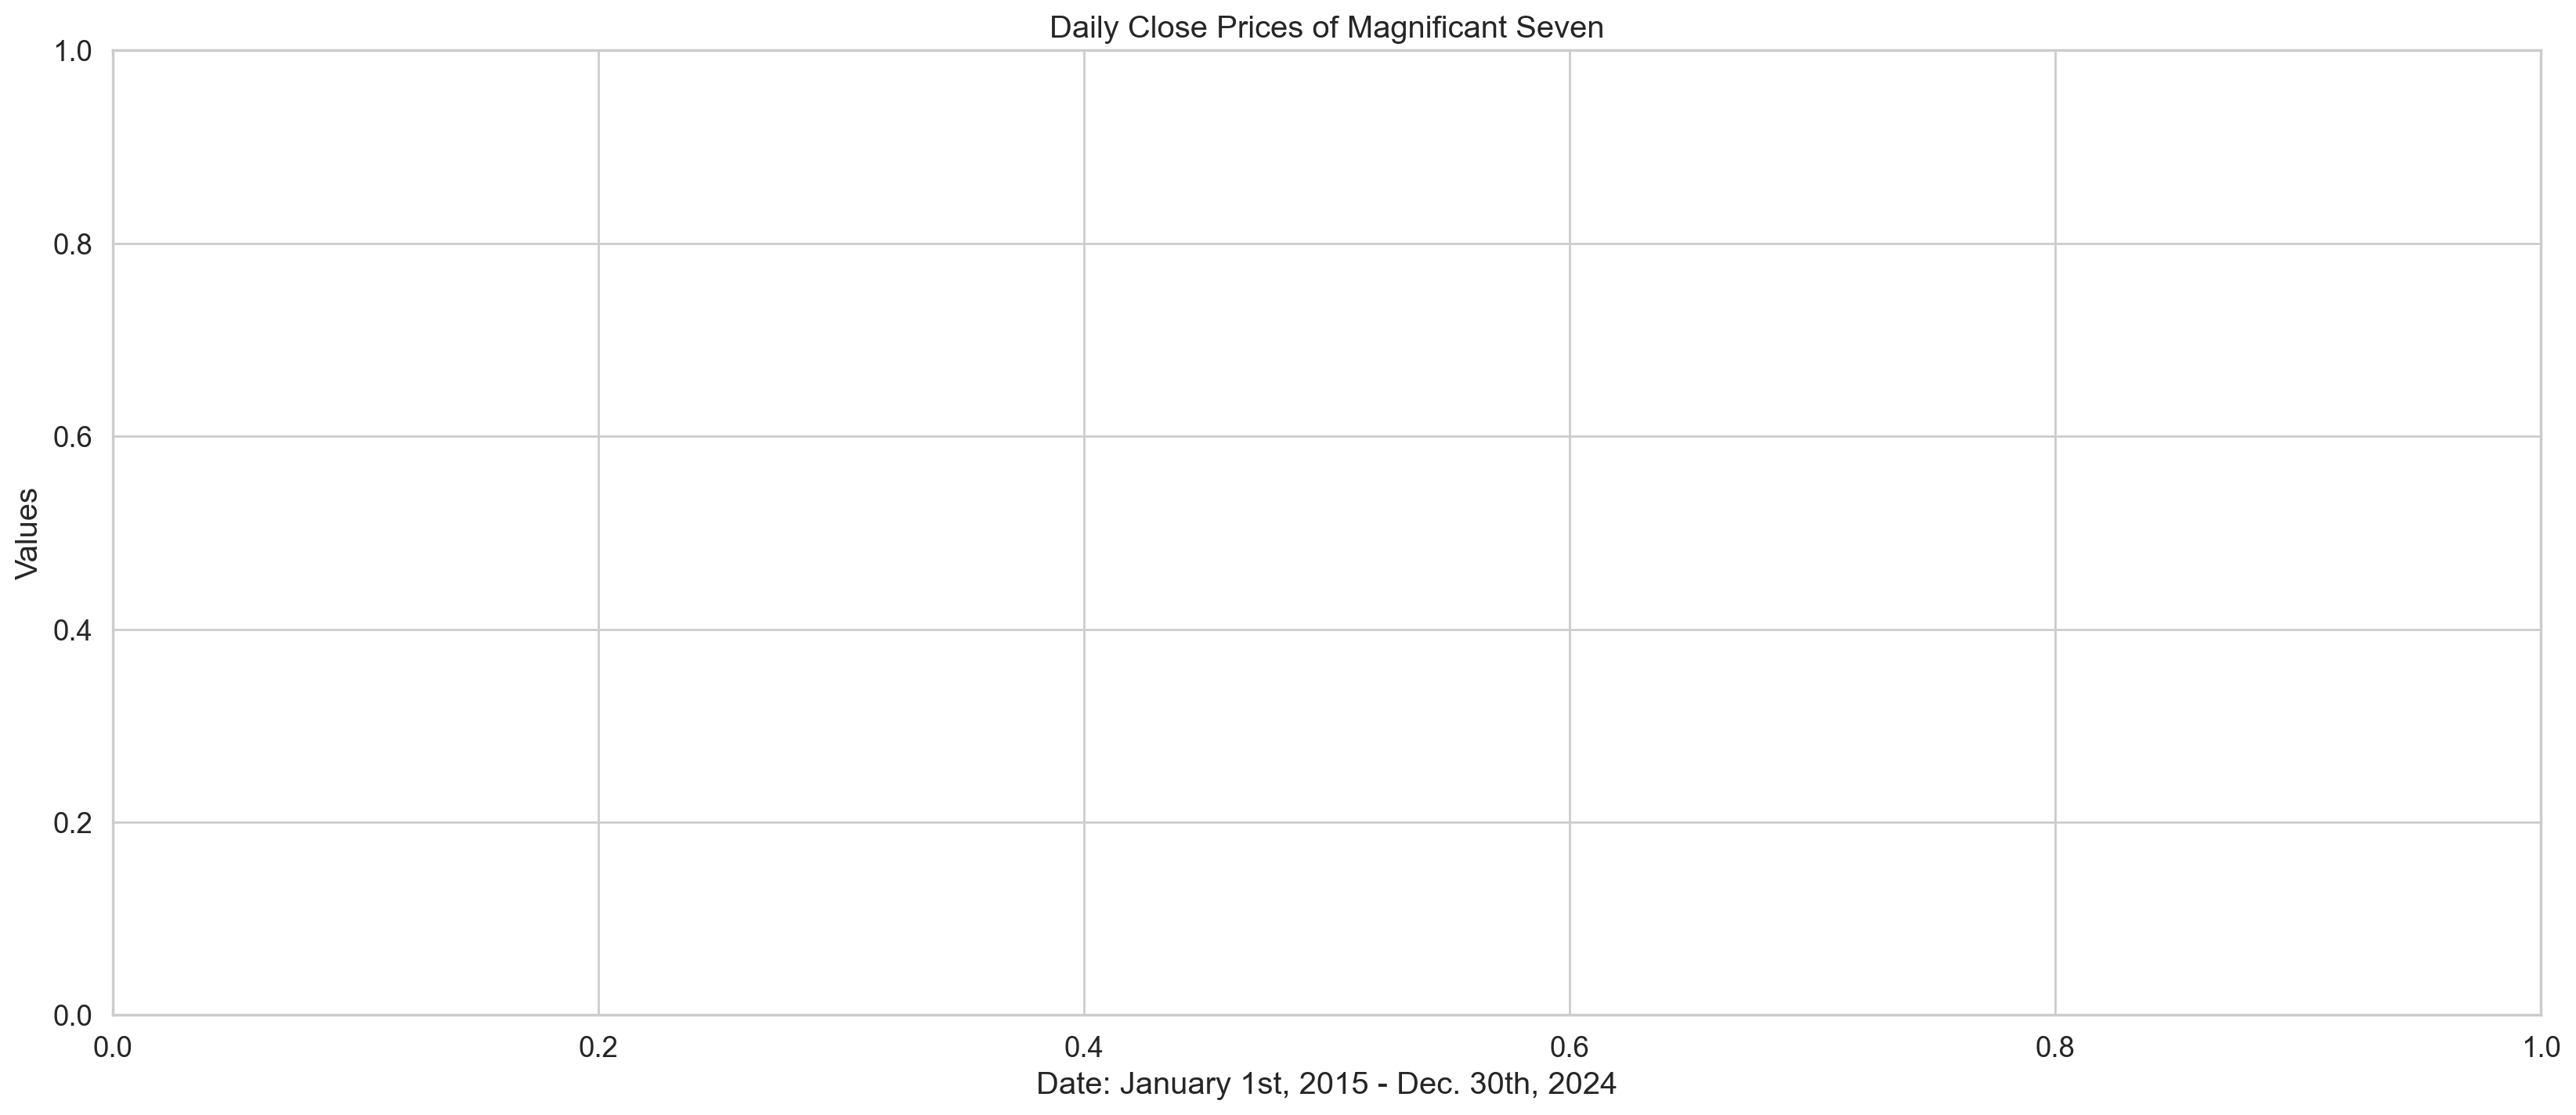

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D","#93D30C","#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 18, 10
RANDOM_SEED = 42 # I'm seeding with 42, if you try the same you will get the same results.
np.random.seed(RANDOM_SEED)
plt.figure(figsize=(20,8)) # Increases the Plot Size
plt.grid(True)
plt.title('Daily Close Prices of Magnificant Seven')
plt.xlabel('Date: January 1st, 2015 - Dec. 30th, 2024')
plt.ylabel('Values')
plt.plot(dataset['BLKC'], 'red', label='CSPX')
plt.plot(dataset['EDMU'], 'orange', label='EDMU')
plt.plot(dataset['ISP6'], 'black', label='ISP6')
plt.plot(dataset['IMEU'], 'blue', label='IMEU')
plt.plot(dataset['IJPN'], 'green', label='IJPN')
plt.plot(dataset['EIMU'], 'pink', label='EIMU')
plt.plot(dataset['DFND'], 'lightblue', label='DFND')
plt.legend()
plt.show()